In [22]:
%%bash
git branch -v 

* emulate_z 315dca2 Scratch that; still some bugs.
  master    2f632ff Figured out the source of that dumb averaging thing.


In [23]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [24]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [25]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z/'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [26]:
y_param = 'logMmin'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233), ('z', 0.5)]
em_params = dict(emulation_point)
try:
    del em_params[y_param]
except KeyError:
    pass

In [27]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

In [28]:
y_param_idx = -1
for idx, p in enumerate(or_params):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [29]:
print em_params[y_param]

[ 11.7         11.96666667  12.23333333  12.5       ]


In [30]:
print em_params

{'logMmin': array([ 11.7       ,  11.96666667,  12.23333333,  12.5       ]), 'f_c': 0.233, 'logM0': 12.0, 'sigma_logM': 0.533, 'logM1': 13.5, 'alpha': 1.083, 'z': 0.5}


In [31]:
rpoints = np.logspace(np.log10(rbins[1]), np.log10(rbins[-2]), 10)

In [32]:
em_params

{'alpha': 1.083,
 'f_c': 0.233,
 'logM0': 12.0,
 'logM1': 13.5,
 'logMmin': array([ 11.7       ,  11.96666667,  12.23333333,  12.5       ]),
 'sigma_logM': 0.533,
 'z': 0.5}

In [33]:
emu2 = ExtraCrispy(training_dir)#no r in params

In [34]:
log_xi_pred = emu2.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

im (1, 10)
im (1, 10)
im (1, 10)
im (1, 10)
Mu r (4, 1, 10)


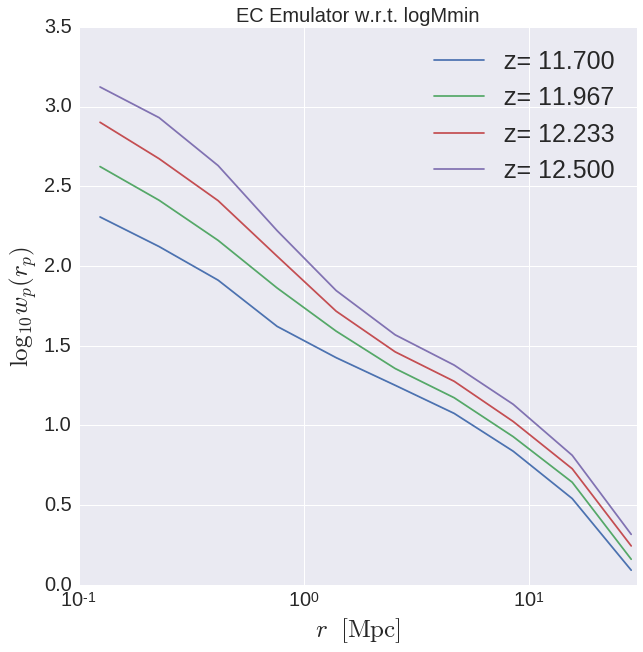

In [35]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [36]:
or_params = PARAMS[:]
#or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r
emu3 = SpicyBuffalo(training_dir, em_param = 'r', params = or_params)#no r in params

In [37]:
print len(emu3.emulators)
print emu3.em_bin_centers

2
[ 0.51975684  0.        ]


In [38]:
print em_params['z']

0.5


In [39]:
log_xi_pred = emu3.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

[False False False False False False False False False False]
False
False 10 False
False 10 True
[False]
False
True 1 False
True 1 True
Breaking
All mu (40, 2)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
im (1,)
(40, 1)
Mu r (1, 40)


In [40]:
print log_xi_pred.shape

(4, 10)


In [41]:
print log_xi_pred[0, :]

[ 2.17078834  1.98984087  1.78574792  1.56315117  1.35990214  1.19436212
  1.01204306  0.77685849  0.48775495  0.02938666]


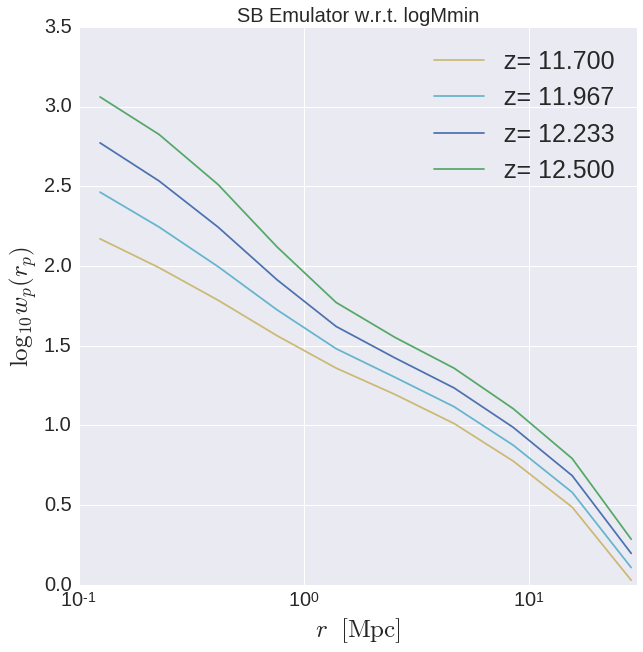

In [42]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("SB Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)